In [32]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import ADASYN

In [33]:
dt=pd.read_csv("customer_churn.csv")
dt.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [34]:
dt.shape

(7043, 21)

In [35]:
dt.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
dt.duplicated().sum()

0

# EDA

In [37]:
dt.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [38]:
dt['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

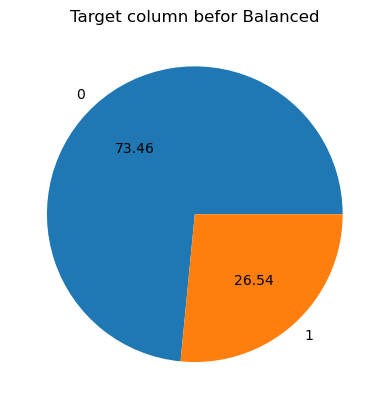

In [39]:
plt.pie(dt['Churn'].value_counts(),autopct='%.2f',labels=["0","1"])
palette_color = sns.color_palette('bright') 
plt.title("Target column befor Balanced")
plt.show()

In [40]:
# Above dataset is imbalanced

In [41]:
object_dt=dt.select_dtypes(include='object')

In [42]:
object_dt

customerID  gender Partner Dependents PhoneService     MultipleLines  \
0     7590-VHVEG  Female     Yes         No           No  No phone service   
1     5575-GNVDE    Male      No         No          Yes                No   
2     3668-QPYBK    Male      No         No          Yes                No   
3     7795-CFOCW    Male      No         No           No  No phone service   
4     9237-HQITU  Female      No         No          Yes                No   
...          ...     ...     ...        ...          ...               ...   
7038  6840-RESVB    Male     Yes        Yes          Yes               Yes   
7039  2234-XADUH  Female     Yes        Yes          Yes               Yes   
7040  4801-JZAZL  Female     Yes        Yes           No  No phone service   
7041  8361-LTMKD    Male     Yes         No          Yes               Yes   
7042  3186-AJIEK    Male      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod TotalCharges Churn  
0              Electronic check        29.85    No  
1                  Mailed check       1889.5    No  
2                  Mailed check       108.15   Yes  
3     Bank transfer (automatic)      1840.75    No  
4              Electronic check       151.65   Yes  
...                         ...          ...   ...  
7038               Mailed check       1990.5    No  
7039    Credit card (automatic)       7362.9    No  
7040           Electronic check       346.45    No  
7041               Mailed check        306.6   Yes  
7042  Bank transfer (automatic)       6844.5    No  

[7043 rows x 18 columns]

In [43]:
object_dt.nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [44]:
dt.drop("customerID",axis=1,inplace=True)

In [45]:
object_dt.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [46]:
catergorical_col=dt.select_dtypes(include="object")

In [47]:
# Encode categorical variables using Label Encoding means convert the cateogorical columns to numericals
label_encoders = {}
for col in catergorical_col:
    le = LabelEncoder()
    dt[col] = le.fit_transform(dt[col])
    label_encoders[col] = le

In [48]:
dt

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85          2505      0  
1                    0              3           56.95          1466      0  
2                    1              3           53.85           157      1  
3                    0              0           42.30          1400      0  
4                    1              2           70.70           925      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80          1597      0  
7039                 1              1          103.20          5698      0  
7040                 1              2           29.60          2994      0  
7041                 1              3           74.40          2660      1  
7042                 1              0          105.65          5407      0  

[7043 rows x 20 columns]

# Feature Selection, Cross-Validation, and Data Splitting

In [49]:
# Separate features and labels
x=dt.drop(columns=['Churn'])
y=dt['Churn']

In [50]:
# Feature Selection
selector = SelectKBest(mutual_info_classif, k=10)
xnew = selector.fit_transform(x,y)

In [51]:
# Split the data
xtrain, xtemp, ytrain, ytemp = train_test_split(xnew, y, test_size=0.3, stratify=y, random_state=42)

In [52]:
xval, xtest, yval, ytest = train_test_split(xtemp, ytemp, test_size=0.5, stratify=ytemp, random_state=42)

In [53]:
print(xtrain.shape, xval.shape, xtest.shape)

(4930, 10) (1056, 10) (1057, 10)


# 5 classification algorithms

In [57]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(max_iter=1000)}

In [58]:
# Train and evaluate each model on the imbalanced dataset
baseline_results = {}

for name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xval)
    y_prob = model.predict_proba(xval)[:, 1]
    
    baseline_results[name] = {
        'Precision': classification_report(yval, y_pred, output_dict=True)['1']['precision'],
        'Recall': classification_report(yval, y_pred, output_dict=True)['1']['recall'],
        'F1-Score': classification_report(yval, y_pred, output_dict=True)['1']['f1-score'],
        'AUC-ROC': roc_auc_score(yval, y_prob)}

In [59]:
baseline_df = pd.DataFrame(baseline_results).T
print(baseline_df)

                     Precision    Recall  F1-Score   AUC-ROC
Logistic Regression   0.628000  0.560714  0.592453  0.837005
Random Forest         0.587045  0.517857  0.550285  0.809389
XGBoost               0.582645  0.503571  0.540230  0.811377
SVM                   0.706215  0.446429  0.547046  0.796854
Neural Network        0.633188  0.517857  0.569745  0.841299


#  CI Technique 1

In [60]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(xtrain, ytrain)

In [61]:
# Train and evaluate each model on the balanced dataset
smote_results = {}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(xval)
    y_prob = model.predict_proba(xval)[:, 1]
    
    smote_results[name] = {
        'Precision': classification_report(yval, y_pred, output_dict=True)['1']['precision'],
        'Recall': classification_report(yval, y_pred, output_dict=True)['1']['recall'],
        'F1-Score': classification_report(yval, y_pred, output_dict=True)['1']['f1-score'],
        'AUC-ROC': roc_auc_score(yval, y_prob)}

In [62]:
smote_df = pd.DataFrame(smote_results).T
print(smote_df)

                     Precision    Recall  F1-Score   AUC-ROC
Logistic Regression   0.488121  0.807143  0.608345  0.836536
Random Forest         0.554307  0.528571  0.541133  0.805969
XGBoost               0.528814  0.557143  0.542609  0.805095
SVM                   0.481799  0.803571  0.602410  0.825147
Neural Network        0.505423  0.832143  0.628880  0.836655


# CI technique 2

In [64]:
# Using Balanced Random Forest
balanced_rf = BalancedRandomForestClassifier(random_state=42)
balanced_rf.fit(xtrain, ytrain)

BalancedRandomForestClassifier(random_state=42)

In [66]:
# Evaluate each model on the validation set
results = {}

for name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xval)
    y_prob = model.predict_proba(xval)[:, 1]

    results[name] = {
        'Precision': classification_report(yval, y_pred, output_dict=True)['1']['precision'],
        'Recall': classification_report(yval, y_pred, output_dict=True)['1']['recall'],
        'F1-Score': classification_report(yval, y_pred, output_dict=True)['1']['f1-score'],
        'AUC-ROC': roc_auc_score(yval, y_prob)}

In [67]:
# Convert the results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print(results_df)

                     Precision    Recall  F1-Score   AUC-ROC
Logistic Regression   0.628000  0.560714  0.592453  0.837005
Random Forest         0.580247  0.503571  0.539197  0.806733
XGBoost               0.582645  0.503571  0.540230  0.811377
SVM                   0.706215  0.446429  0.547046  0.796854
Neural Network        0.691176  0.335714  0.451923  0.840121


# CI tehcnique 3

In [68]:
# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(xtrain, ytrain)

In [69]:
# Train and evaluate each model on the balanced dataset using ADASYN
adasyn_results = {}

for name, model in models.items():
    model.fit(X_train_adasyn, y_train_adasyn)
    y_pred = model.predict(xval)
    y_prob = model.predict_proba(xval)[:, 1]
    
    adasyn_results[name] = {
        'Precision': classification_report(yval, y_pred, output_dict=True)['1']['precision'],
        'Recall': classification_report(yval, y_pred, output_dict=True)['1']['recall'],
        'F1-Score': classification_report(yval, y_pred, output_dict=True)['1']['f1-score'],
        'AUC-ROC': roc_auc_score(yval, y_prob)}

In [70]:
adasyn_df = pd.DataFrame(adasyn_results).T
print(adasyn_df)

                     Precision    Recall  F1-Score   AUC-ROC
Logistic Regression   0.473896  0.842857  0.606684  0.831211
Random Forest         0.551852  0.532143  0.541818  0.797888
XGBoost               0.537162  0.567857  0.552083  0.802653
SVM                   0.458414  0.846429  0.594730  0.824478
Neural Network        0.439929  0.889286  0.588652  0.834994


In [71]:
# Combine all results for easy comparison
all_results = pd.concat([results_df, adasyn_df,smote_df], keys=['Balanced_rf', 'ADASYN',"SMOTE"])
print(all_results)

                                 Precision    Recall  F1-Score   AUC-ROC
Balanced_rf Logistic Regression   0.628000  0.560714  0.592453  0.837005
            Random Forest         0.580247  0.503571  0.539197  0.806733
            XGBoost               0.582645  0.503571  0.540230  0.811377
            SVM                   0.706215  0.446429  0.547046  0.796854
            Neural Network        0.691176  0.335714  0.451923  0.840121
ADASYN      Logistic Regression   0.473896  0.842857  0.606684  0.831211
            Random Forest         0.551852  0.532143  0.541818  0.797888
            XGBoost               0.537162  0.567857  0.552083  0.802653
            SVM                   0.458414  0.846429  0.594730  0.824478
            Neural Network        0.439929  0.889286  0.588652  0.834994
SMOTE       Logistic Regression   0.488121  0.807143  0.608345  0.836536
            Random Forest         0.554307  0.528571  0.541133  0.805969
            XGBoost               0.528814  0.55714